In [1]:
import pandas as pd

data_path = 'data.xlsx'
data = pd.read_excel(data_path)

data.head()

,participant,truehour,average_response_duration/LAYOUT1,average_response_duration/LAYOUT2
0,1.0,8.0,2.753450,3.765111
1,1.0,12.0,4.180465,4.997589
2,1.0,18.0,4.138178,4.664619
3,1.0,20.0,4.793638,4.664255
4,NaN,NaN,NaN,NaN


In [2]:
from scipy.stats import ttest_rel

def perform_paired_ttest(df, hour):
    hour_data = df[df['truehour'] == hour]
    
    t_stat, p_val = ttest_rel(hour_data['average_response_duration/LAYOUT1'], 
                              hour_data['average_response_duration/LAYOUT2'])
    
    return t_stat, p_val

t_stat_8, p_val_8 = perform_paired_ttest(data, 8)
t_stat_12, p_val_12 = perform_paired_ttest(data, 12)
t_stat_18, p_val_18 = perform_paired_ttest(data, 18)
t_stat_20, p_val_20 = perform_paired_ttest(data, 20)

print('Hour 8:\nT-Statistic: ', t_stat_8, '| P-value: ', p_val_8) 
print('Hour 12:\nT-Statistic: ', t_stat_12, '| P-value: ', p_val_12)
print('Hour 18:\nT-Statistic: ', t_stat_18, '\t | P-value: ', p_val_18)
print('Hour 20:\nT-Statistic: ', t_stat_20, '| P-value: ', p_val_20) 

Hour 8:
T-Statistic:  0.6259182665724409 | P-value:  0.5388156322384504
Hour 12:
T-Statistic:  1.3290167354483575 | P-value:  0.19958252784243954
Hour 18:
T-Statistic:  1.84539595090932 	 | P-value:  0.0806239096059331
Hour 20:
T-Statistic:  1.4085309080454147 | P-value:  0.1751282876180363


In [3]:
def calculate_stats(df, hour):
    specific_hour_data = df[df['truehour'] == hour]
    mean1 = specific_hour_data['average_response_duration/LAYOUT1'].mean()
    mean2 = specific_hour_data['average_response_duration/LAYOUT2'].mean()
    std1 = specific_hour_data['average_response_duration/LAYOUT1'].std()
    std2 = specific_hour_data['average_response_duration/LAYOUT2'].std()
    return mean1, mean2, std1, std2

stats_8 = calculate_stats(data, 8)
stats_12 = calculate_stats(data, 12)
stats_18 = calculate_stats(data, 18)
stats_20 = calculate_stats(data, 20)

print('Hour 8 Statistics:\n', stats_8) 
print('Hour 12 Statistics:\n', stats_12) 
print('Hour 18 Statistics:\n', stats_18) 
print('Hour 20 Statistics:\n', stats_20) 

Hour 8 Statistics:
 (2.1036627508, 2.0244747388, 0.6259056113496376, 0.7449698035693378)
Hour 12 Statistics:
 (1.9798100313649996, 1.7975414195300001, 0.860319499246079, 0.9359366215687309)
Hour 18 Statistics:
 (2.26914634845, 2.01579890105, 0.8382188759042256, 0.836080062704419)
Hour 20 Statistics:
 (2.18851024765, 1.9917062262999998, 0.9918188026741591, 0.9082573653638037)


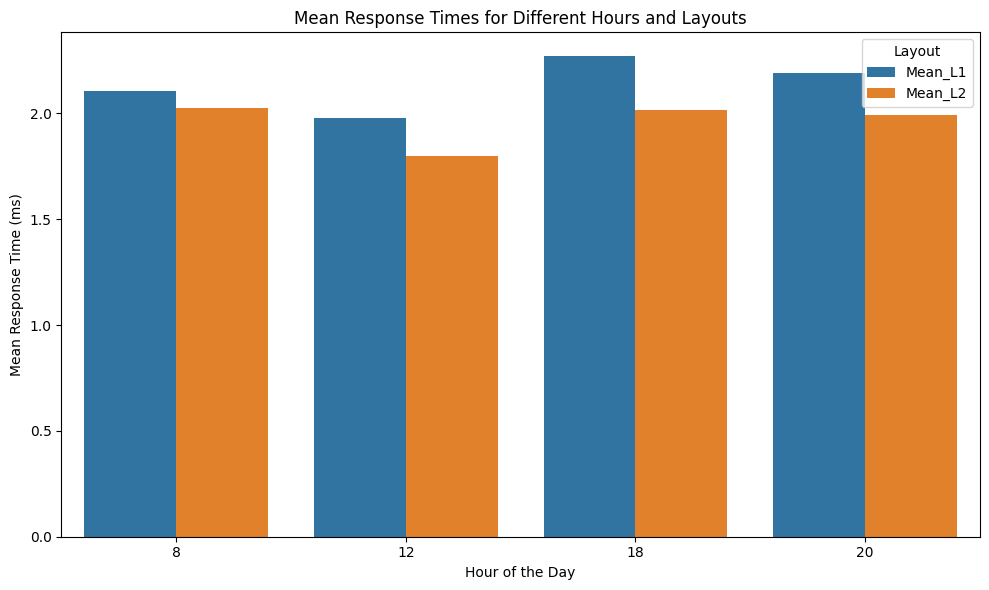

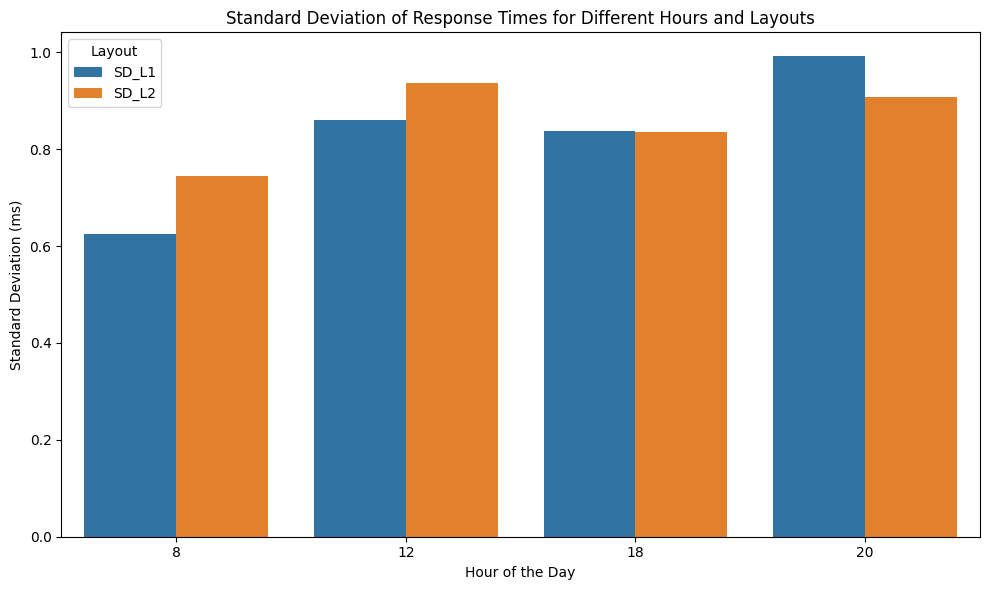

,Mean_L1,Mean_L2,SD_L1,SD_L2
Hour,,,,
8,2.103663,2.024475,0.625906,0.744970
12,1.979810,1.797541,0.860319,0.935937
18,2.269146,2.015799,0.838219,0.836080
20,2.188510,1.991706,0.991819,0.908257


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

times = [8, 12, 18, 20]

stats = {}
for hour in times:
    stats[hour] = calculate_stats(data, hour)

plot_data = pd.DataFrame(stats).T
plot_data.columns = ['Mean_L1', 'Mean_L2', 'SD_L1', 'SD_L2']
plot_data['Hour'] = plot_data.index

plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='value', hue='variable', data=pd.melt(plot_data, id_vars='Hour', value_vars=['Mean_L1', 'Mean_L2']))
plt.title('Mean Response Times for Different Hours and Layouts')
plt.ylabel('Mean Response Time (ms)')
plt.xlabel('Hour of the Day')
plt.legend(title='Layout')
plt.tight_layout()
plt.show()

mean_response_time_plot_path = 'mean_response_times.png'
plt.savefig(mean_response_time_plot_path)
plt.close()

sd_data = plot_data[['SD_L1', 'SD_L2', 'Hour']]

plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='value', hue='variable', data=pd.melt(sd_data, id_vars='Hour', value_vars=['SD_L1', 'SD_L2']))
plt.title('Standard Deviation of Response Times for Different Hours and Layouts')
plt.ylabel('Standard Deviation (ms)')
plt.xlabel('Hour of the Day')
plt.legend(title='Layout')
plt.tight_layout()
plt.show()

sd_response_time_plot_path = 'sd_response_times.png'
plt.savefig(sd_response_time_plot_path)
plt.close()

mean_sd_table = plot_data.set_index('Hour')
mean_sd_table_path = 'mean_sd_table.csv'
mean_sd_table.to_csv(mean_sd_table_path)
mean_sd_table